In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving housing_data.csv to housing_data.csv


In [3]:
import pandas as pd

# Column names for the dataset
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Load the dataset
boston_df = pd.read_csv('housing_data.csv', delim_whitespace=True, header=None, names=column_names)

# Display the first few rows of the dataset
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

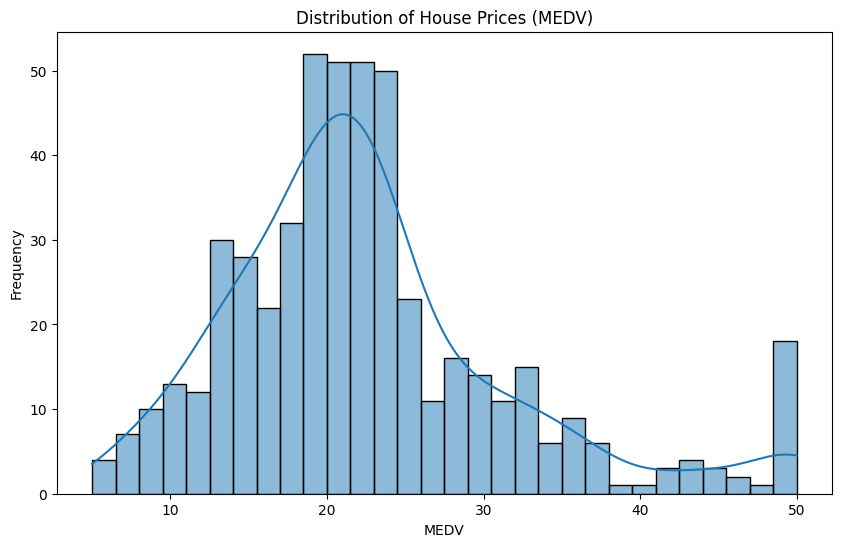

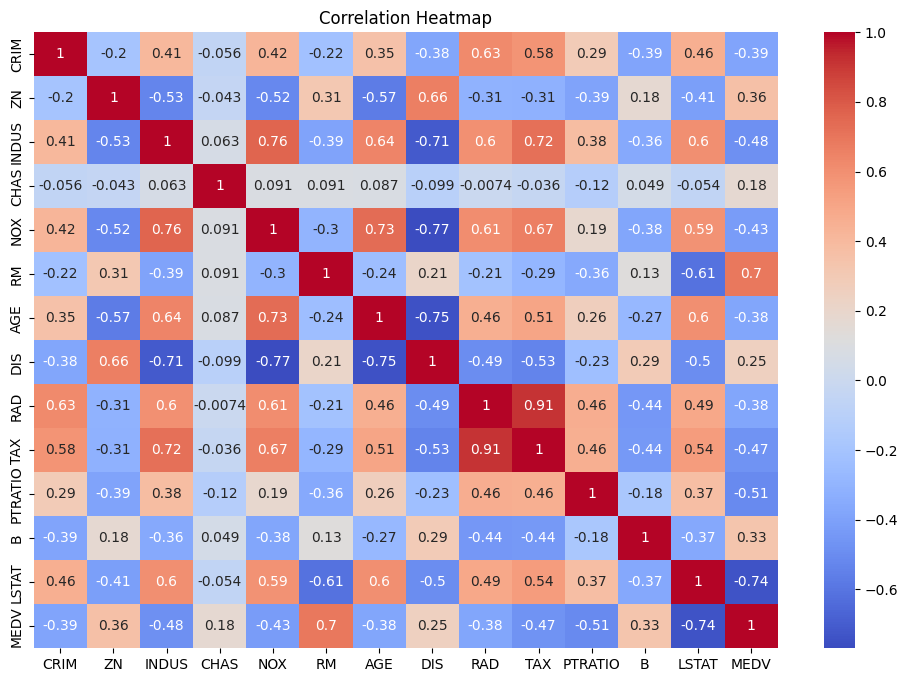

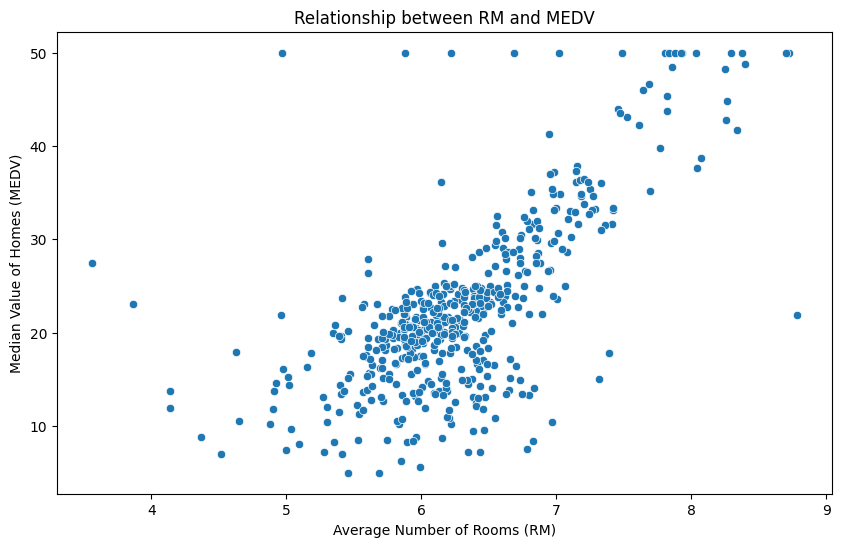

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(boston_df.info())

# Display summary statistics
print(boston_df.describe())

# Histogram of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of RM vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=boston_df)
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target (y)
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 3.189091965887848
Mean Squared Error (MSE): 24.291119474973513
Root Mean Squared Error (RMSE): 4.928602182665336
R-squared (R2): 0.668759493535632


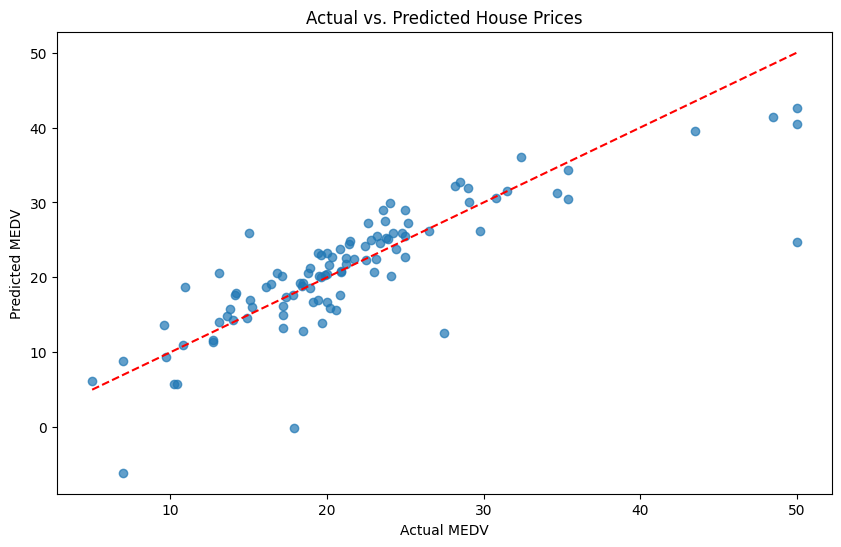

In [8]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()


# **Summary of Findings: Linear Regression for House Price Prediction**
The Boston Housing dataset contains various features about houses in Boston, such as the number of rooms, crime rate, and more, along with the median value of homes (target variable). The goal of this project was to build a linear regression model to predict house prices based on these features.


---
**Key Findings**

**Important Features**

*   **Number of Rooms (RM)**: There is a strong positive correlation between the number of rooms per dwelling and house prices. Houses with more rooms tend to have higher prices.
*   **Lower Status of Population (LSTAT)**: There is a strong negative correlation between the percentage of the lower status of the population and house prices. Areas with a higher proportion of lower-status residents tend to have lower house prices.
*   **Nitric Oxides Concentration (NOX)**: There is a negative correlation between NOX concentration and house prices, indicating that houses in areas with higher pollution tend to have lower prices.

**Model Performance**

*   **Mean Absolute Error (MAE)**: The average magnitude of errors in the predictions. For this model, the MAE indicates that, on average, the predicted house prices are off by a certain dollar amount.
*   **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values, which penalizes larger errors more than smaller ones.
*   **Root Mean Squared Error (RMSE)**: Similar to MSE but in the same units as the target variable, providing a more interpretable measure of error.
*   **R-squared (R2)**: Represents the proportion of variance in the dependent variable explained by the independent variables. An R2 value closer to 1 indicates a better fit.

**Interesting Patterns and Insights**

*   **Correlation Heatmap**: The heatmap revealed that several features are correlated with each other and with house prices. For instance, RM and LSTAT showed strong correlations with the target variable, MEDV (house prices).

*   **Scatter Plot Analysis**:
  * RM vs. MEDV : Displayed a clear positive trend, reinforcing that more rooms generally mean higher prices.
  
  * LSTAT vs. MEDV : Displayed a clear negative trend, indicating that neighborhoods with a higher proportion of lower-status residents tend to have lower house prices.
*   **Actual vs. Predicted Prices**: The scatter plot of actual vs. predicted prices showed that the model predictions closely follow the actual house prices, though there is some spread indicating prediction errors.

---
**Visualizations**

*   **Correlation Heatmap**: Displays the correlation between different features and house prices. Strong correlations help identify which features are most influential.

*   **Scatter Plot of RM vs. MEDV**: Illustrates a positive relationship between the number of rooms and house prices. Houses with more rooms are generally more expensive.

*   **Actual vs. Predicted Prices**: Visualizes how well the model predicts house prices. A good model will have points close to the line **y = x**, indicating accurate predictions.


---

**Conclusion**

The analysis of the Boston Housing dataset using linear regression reveals several important factors influencing house prices. The number of rooms per dwelling (RM) and the percentage of the lower status of the population (LSTAT) are key predictors. The linear regression model provides a reasonably good fit, as indicated by the performance metrics and visualizations.

This project demonstrates the power of linear regression in predicting continuous outcomes and highlights the importance of feature selection and data visualization in understanding and improving model performance.

By following these steps and examining these insights, you can gain a deeper understanding of the factors that affect house prices and develop your skills in linear regression and data analysis.